This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

\begin{equation*}
\newcommand{\dd}{\text{d}}
\newcommand{\e}{\operatorname{e}}
\end{equation*}

# 1 Introduction
## 1.1 What is structure-borne sound?

**Sound**:

* exists only in elastic media
* is a *wave*:
    - temporal changes *and* spatial changes are connected
    - travels/propagates (has a speed) and transports energy 
* causes (small) local and temporal changes of stresses (for fluids: pressure) and strains in the medium

**Structure-borne sound**:

* exists in all elastic solids:
    - metal structures
    - rock
    - plastic 
    - wood
    - ...
* compared to fluid-borne sound:
    - shear stresses are possible
    - different types of waves
    
**Vibration**:

* is no sound (no propagation involved, no energy transport)
* only temporal changes
* common basis for mathematical modeling of temporal behavior

## 1.2 Vibration of a simple oscillator
* (temporal) changes in just one variable (single degree of freedom - SDOF)
* example: mechanical SDOF oscillator - spring-mass-system


![(picture mass and spring)](tikzfig/mass_spring.svg "picture mass and spring")


* displacement $\xi$ is change from position at rest
* force to compress spring (sign due to choice made in picture) where $s$ is the stiffness of the spring
\begin{equation}
  F_s = -s \xi
\end{equation}
* force to accelerate mass $m$
\begin{equation}
  F_m = m \frac{\dd^2}{\dd t^2}\xi
\end{equation}
* equilibrium $F_s=F_m$ leads to 
\begin{equation}\label{eq:sdof1}
  m \frac{\dd^2}{\dd t^2}\xi+s \xi=0
\end{equation}
* this is an linear ordinary differential equation (ODE) with constant coefficients
* solve this - you know how, but just for fun lets use the computer for this

In [1]:
import sympy as sy # symbolic math 
xi = sy.Function('xi') # displacement is a function (of time)
t = sy.symbols('t',real=True) # time variable
m,s = sy.symbols('m s', real=True, positive=True) #mass and stiffness
sy.dsolve(m*xi(t).diff(t,2) + s*xi(t),xi(t)) #find solution of ODE

Eq(xi(t), C1*sin(sqrt(s)*t/sqrt(m)) + C2*cos(sqrt(s)*t/sqrt(m)))

* define solution angular frequency - the **eigenfrequency**
\begin{gather}
  \omega_0=\sqrt{\frac{s}{m}}
\end{gather}
* pick first part of solution - sinusoidal function
\begin{gather}
  \xi(t) = \xi_1 \sin(\omega t) \ \ \text{where} \ \ \omega=\omega_0  
\end{gather}
* now plot the forces necessary to move the mass and the spring

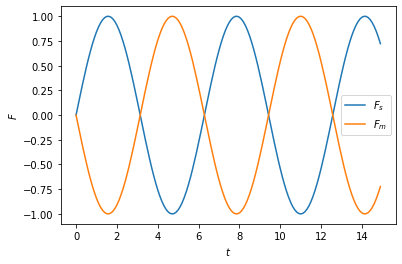

In [2]:
import numpy as np # numeric math
import matplotlib.pyplot as pl
%matplotlib inline
# to avoid confusion with the symbolic math, we use i at the end of variable names
ti = np.arange(0,15,0.1) # time
om0 = 1.0 # assume s=1 and m=1
xii = np.sin(om0*ti)# assume \xi_1=1 
Fs = xii # force for the spring
Fm = -om0**2 * xii # force for the mass (second derivative)
pl.plot(ti,Fs,label=r'$F_s$')
pl.plot(ti,Fm,label=r'$F_m$')
pl.legend()
pl.xlabel(r'$t$')
pl.ylabel(r'$F$');

## 1.3 Vibrational energy

* both spring and mass also store energy
* spring potential energy
\begin{gather}
W_{pot}=\frac12 s \xi^2
\end{gather}
* mass kinetic energy 
\begin{gather}
W_{kin}=\frac12 m \left(\frac{\dd}{\dd t}\xi\right)^2 = \frac12 m v^2
\end{gather}
* plot both the potential and the kinetic energy over time

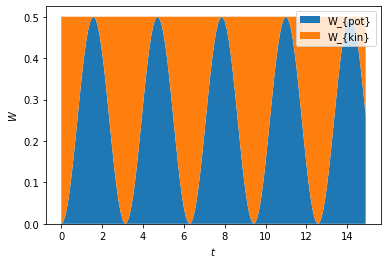

In [3]:
vi = np.cos(om0*ti) # derivative of xii
Wpot = 0.5*xii**2
Wkin = 0.5*vi**2
pl.stackplot(ti,Wpot,Wkin,labels=(r'W_{pot}',r'W_{kin}'))
pl.legend()
pl.xlabel(r'$t$')
pl.ylabel(r'$W$');

* total energy remains constant:
  - no energy input - no external forces, 
  - no energy losses - no damping
* the temporal mean of both energies are equal:
\begin{equation}
  \overline{E_{pot}}=\overline{E_{kin}}
\end{equation}
* more general principle: Hamilton's principle states that for any mechanical system the temporal mean of the difference of potential and kinetic energy assumes an extreme value (mostly a minimum)

## 1.4 Damping

* let us now introduce damping, which may have different physical reasons:
  - thermal effects
  - friction
  - viscoelastic material behavior 


![(picture mass, spring and damper)](tikzfig/mass_spring_damper.svg "picture mass and spring")

* (some) frequently used models
  - viscous damping: damping force is proportional to the velocity, proportionality constant $c$
    \begin{gather}
    F_d= c \frac{\dd}{\dd t}\xi
    \end{gather}
  - structural damping: a model that applies to harmonic displacement only - amplitude of damping force is proportional to displacement, but independent of frequency with a constant $\eta$ (**loss factor**)
    \begin{gather}
    F_d= \frac{\eta s}{\omega} \frac{\dd}{\dd t}\xi
    \end{gather}
* equilibrium now contains also $F_d$
* for viscous damping:
\begin{equation}\label{eq:sdof2}
  m \frac{\dd^2}{\dd t^2}\xi+c \frac{\dd}{\dd t}\xi+s \xi=0
\end{equation}
* let's try to solve this with symbolic computer math:

In [4]:
c,ome0,delta = sy.symbols('c omega_0 delta', real=True, positive=True) 
sol = sy.dsolve(m*xi(t).diff(t,2) + c*xi(t).diff(t) + s*xi(t),xi(t))
sol

Eq(xi(t), C1*exp(t*(-c - sqrt(c**2 - 4*m*s))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*m*s))/(2*m)))

* introduce $\omega_0$ and $\delta=\frac{c}{2m}$ (**modal damping**):

In [5]:
sol.subs({s:m*ome0**2, c:delta*2*m}).simplify()

Eq(xi(t), (C1*exp(-t*sqrt(delta**2 - omega_0**2)) + C2*exp(t*sqrt(delta**2 - omega_0**2)))*exp(-delta*t))

* exponents of the terms in the bracket are imaginary, if $\delta<\omega_0$
* assuming $C_1=C_2=2\xi_1$ (just one possible solution) leads to
\begin{equation}
  \xi(t) = \xi_1 \cos\left(\sqrt{\omega_0^2-\delta^2}t\right)\e^{-\delta t}
\end{equation}
* the frequency $\omega_d = \sqrt{\omega_0^2-\delta^2}$ is the **characteristic frequency**

*What would a plot for the forces $F_s, F_m, F_d$ look like this time? You can surely try out for yourself! (as an example, take $\omega_0=1$ and $\delta=0.1$ )*

#### ----------------------------------------
* so far, we discussed 'free' vibrations
* mathematical model where the system vibrates without external forcing
* with damping (as always in practice) the amplitude of the oscillator vanishes with time
* external forcing (next topic) may inject energy and a non-vanishing amplitude

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Structure-borne sound lecture notes, 2019.

In [6]:
# this is just for custom formatting
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()